In [1]:
import pandas as pd
import glob

# 指定需要读取的列
columns_to_read = ['age', 'income', 'is_active', 'gender']
# age_column = ['age']
# income_column = ['income']
# purchase_history_column = ['purchase_history']
# is_active_column = ['is_active']
# gender_column = ['gender']

# 获取所有满足条件的文件列表
file_list = sorted(glob.glob('30G_data_new/part-*.parquet'))

df = pd.concat(
    (pd.read_parquet(file, columns=columns_to_read, engine='pyarrow') for file in file_list),
    ignore_index=True
)

df.head()


,age,income,is_active,gender
0,97,7787.23,False,女
1,31,286306.19,False,男
2,82,136343.81,False,男
3,90,179801.85,True,男
4,73,918006.25,False,女


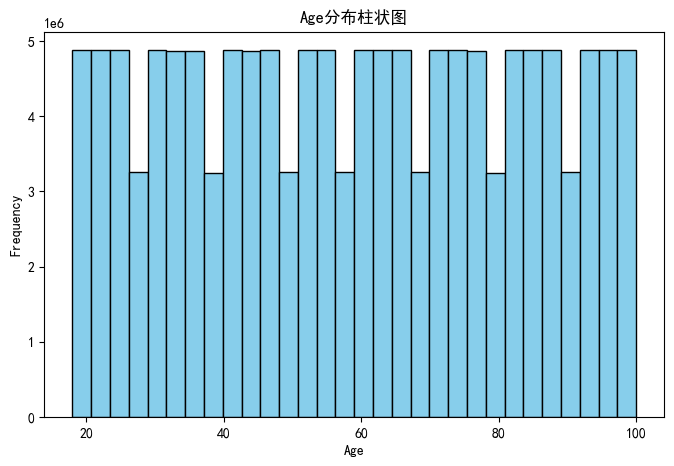

In [2]:
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.figure(figsize=(8, 5))
plt.hist(df['age'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title("Age分布柱状图")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

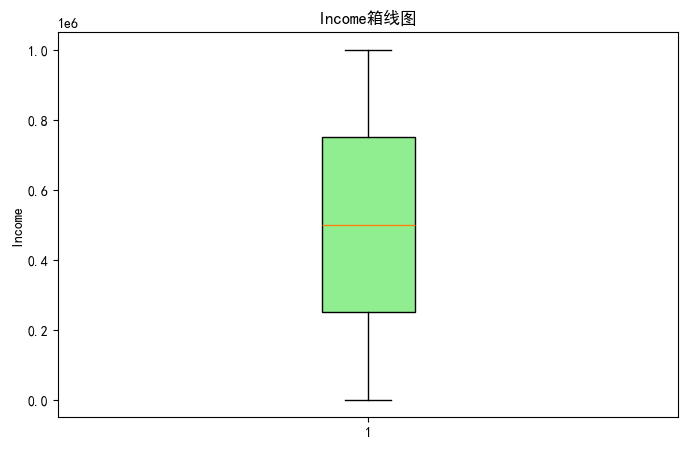

In [3]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.figure(figsize=(8, 5))
plt.boxplot(df['income'].dropna(), patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title("Income箱线图")
plt.ylabel("Income")
plt.show()

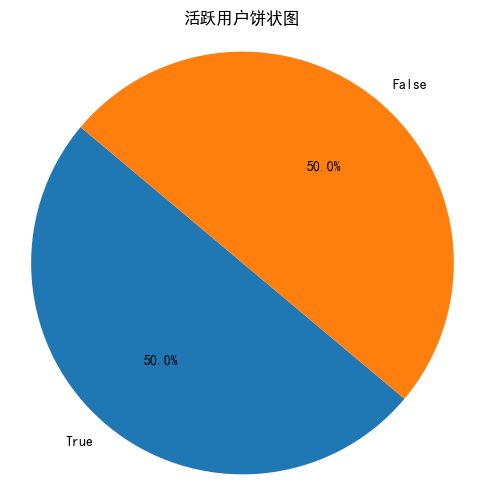

In [4]:
import matplotlib.pyplot as plt

active_counts = df['is_active'].value_counts()

labels = active_counts.index.astype(str)
sizes = active_counts.values

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('活跃用户饼状图')
plt.axis('equal')
plt.show()

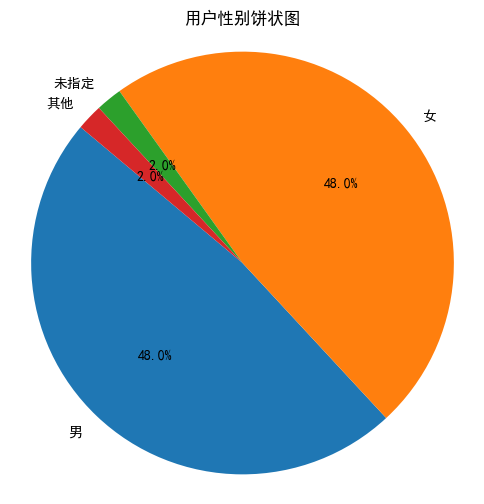

In [5]:
gender_counts = df['gender'].value_counts()

labels = gender_counts.index.astype(str)
sizes = gender_counts.values

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('用户性别饼状图')
plt.axis('equal')
plt.show()

In [6]:
# 去除年龄较大的异常值
df = df[(df['age'] <= 65)]

# 去除收入过低的异常值
df = df[(df['income'] > 10000)]

# 去除性别缺失值
df = df[(df['gender'] != '未指定') & (df['gender'] != '其他')]

df.shape

(74198449, 4)

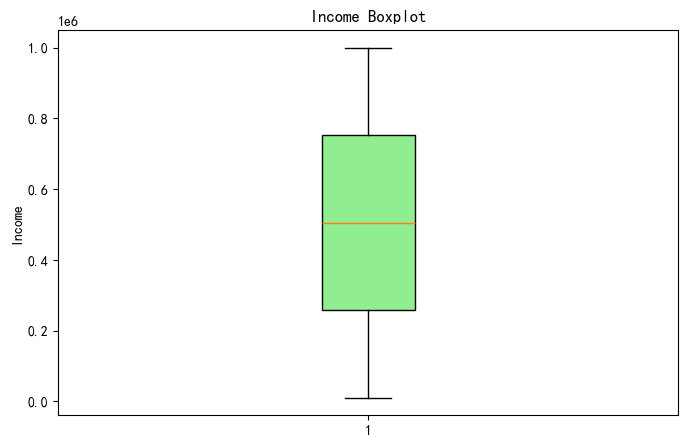

In [7]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.figure(figsize=(8, 5))
plt.boxplot(df['income'].dropna(), patch_artist=True, boxprops=dict(facecolor='lightgreen'))
plt.title("Income Boxplot")
plt.ylabel("Income")
plt.show()

In [8]:
# 定义收入阈值
income_threshold = 890000

# 筛选高价值用户
high_value_users = df[
    (df['income'] >= income_threshold) &
    (df['is_active'] == True)
]

# 统计高价值用户数量
print(f"高价值用户数量：{high_value_users.shape[0]}")
print(f"高价值用户占比：{high_value_users.shape[0] / df.shape[0]*100}%")

高价值用户数量：4123362
高价值用户占比：5.557207806324901%
